chapter 8 

In [1]:
import polars as pl
import math
import numpy as np

In [2]:
print(f"{math.pi=}")

math.pi=3.141592653589793


In [ ]:
rng = np.random.default_rng(1729)
print(f"{rng.random()=}")

rng.random()=0.03074202960516803


In [12]:
math.pi = 3.141592653589793
# rng.random()=0.03074202960516803

element wise

In [ ]:
penguins = pl.read_csv("data/penguins.csv", null_values="NA").select(
    "species",
    "island",
    "sex",
    "year",
    mass=pl.col("body_mass_g")/1000,
)
penguins.with_columns(
    mass_sqrt=pl.col("mass").sqrt(),
    mass_exp=pl.col("mass").exp()
)

species,island,sex,year,mass,mass_sqrt,mass_exp
str,str,str,i64,f64,f64,f64
"""Adelie""","""Torgersen""","""male""",2007,3.75,1.936492,42.521082
"""Adelie""","""Torgersen""","""female""",2007,3.8,1.949359,44.701184
"""Adelie""","""Torgersen""","""female""",2007,3.25,1.802776,25.79034
"""Adelie""","""Torgersen""",null,2007,null,null,null
"""Adelie""","""Torgersen""","""female""",2007,3.45,1.857418,31.500392
…,…,…,…,…,…,…
"""Chinstrap""","""Dream""","""male""",2009,4.0,2.0,54.59815
"""Chinstrap""","""Dream""","""female""",2009,3.4,1.843909,29.9641
"""Chinstrap""","""Dream""","""male""",2009,3.775,1.942936,43.597508


In [ ]:
penguins.select(pl.col("mass").mean(), pl.col("island").first())

mass,island
f64,str
4.201754,"""Torgersen"""


In [18]:
penguins

species,island,sex,year,mass
str,str,str,i64,f64
"""Adelie""","""Torgersen""","""male""",2007,3.75
"""Adelie""","""Torgersen""","""female""",2007,3.8
"""Adelie""","""Torgersen""","""female""",2007,3.25
"""Adelie""","""Torgersen""",null,2007,null
"""Adelie""","""Torgersen""","""female""",2007,3.45
…,…,…,…,…
"""Chinstrap""","""Dream""","""male""",2009,4.0
"""Chinstrap""","""Dream""","""female""",2009,3.4
"""Chinstrap""","""Dream""","""male""",2009,3.775


In [20]:
penguins.select(pl.col("island").unique())

island
str
"""Dream"""
"""Torgersen"""
"""Biscoe"""


In [ ]:
penguins.select(
    pl.col("species")
    .unique()
    .repeat_by(3000)
    .explode()
    .extend_constant("Saiyan", n=1
                     )
)

species
str
"""Gentoo"""
"""Gentoo"""
"""Gentoo"""
"""Gentoo"""
"""Gentoo"""
…
"""Chinstrap"""
"""Chinstrap"""
"""Chinstrap"""


In [25]:
pl.DataFrame(
    {
        "x": [-2.0, 0.0, 0.5, 1.0, math.e, 1000.0]
    }
).with_columns(
    abs=pl.col("x").abs(),
    exp=pl.col("x").exp(),
    log2=pl.col("x").log(2),
    log10=pl.col("x").log10(),
    log1p=pl.col("x").log1p(),
    sign=pl.col("x").sign(),
    sqrt=pl.col("x").sqrt(),
)

x,abs,exp,log2,log10,log1p,sign,sqrt
f64,f64,f64,f64,f64,f64,f64,f64
-2.0,2.0,0.135335,NaN,NaN,NaN,-1.0,NaN
0.0,0.0,1.0,-inf,-inf,0.0,0.0,0.0
0.5,0.5,1.648721,-1.0,-0.30103,0.405465,1.0,0.707107
1.0,1.0,2.718282,0.0,0.0,0.693147,1.0,1.0
2.718282,2.718282,15.154262,1.442695,0.434294,1.313262,1.0,1.648721
1000.0,1000.0,inf,9.965784,3.0,6.908755,1.0,31.622777


In [ ]:
pl.DataFrame(
    {"x": [-math.pi, 0.0, 1.0, math.pi, 2*math.pi, 90.0, 180.0, 360.0]}
).with_columns(
    arccos=pl.col("x").arccos(),
    cos=pl.col("x").cos(),
    degrees=pl.col("x").degrees(),
    radians=pl.col("x").radians(),
    sin=pl.col("x").sin()
)

x,arccos,cos,degrees,radians,sin
f64,f64,f64,f64,f64,f64
-3.141593,NaN,-1.0,-180.0,-0.054831,-1.2246e-16
0.0,1.570796,1.0,0.0,0.0,0.0
1.0,0.0,0.540302,57.29578,0.017453,0.841471
3.141593,NaN,-1.0,180.0,0.054831,1.2246e-16
6.283185,NaN,1.0,360.0,0.109662,-2.4493e-16
90.0,NaN,-0.448074,5156.620156,1.570796,0.893997
180.0,NaN,-0.59846,10313.240312,3.141593,-0.801153
360.0,NaN,-0.283691,20626.480625,6.283185,0.958916


In [ ]:
pl.DataFrame(
    {"x": [-6.0, -0.5, 0.0, 0.5, math.pi, 9.9, 9.99, 9.999]}
).with_columns(
    ceil=pl.col("x").ceil(),
    clip=pl.col("x").clip(-1, 1),
    cut=pl.col("x").cut([-1, 1], labels=["bad", "neutral", "good"]),
    floor=pl.col("x").floor(),
    qcut=pl.col("x").qcut([0.5], labels=["below median", "above median"]),
    round2=pl.col("x").round(2),
    round0=pl.col("x").round(0),
)

x,ceil,clip,cut,floor,qcut,round2,round0
f64,f64,f64,cat,f64,cat,f64,f64
-6.0,-6.0,-1.0,"""bad""",-6.0,"""below median""",-6.0,-6.0
-0.5,-0.0,-0.5,"""neutral""",-1.0,"""below median""",-0.5,-1.0
0.0,0.0,0.0,"""neutral""",0.0,"""below median""",0.0,0.0
0.5,1.0,0.5,"""neutral""",0.0,"""below median""",0.5,1.0
3.141593,4.0,1.0,"""good""",3.0,"""above median""",3.14,3.0
9.9,10.0,1.0,"""good""",9.0,"""above median""",9.9,10.0
9.99,10.0,1.0,"""good""",9.0,"""above median""",9.99,10.0
9.999,10.0,1.0,"""good""",9.0,"""above median""",10.0,10.0


In [ ]:
x = [42.0, math.nan, None, math.inf, -math.inf]
(
    pl.DataFrame({"x": x}).with_columns(
        fill_nan=pl.col("x").fill_nan(999),
        fill_nill=pl.col("x").fill_null(0),
        is_finite=pl.col("x").is_finite(),
        is_infinite=pl.col("x").is_infinite(),
        is_nan=pl.col("x").is_nan(),
        is_null=pl.col("x").is_null()

    )
)

x,fill_nan,fill_nill,is_finite,is_infinite,is_nan,is_null
f64,f64,f64,bool,bool,bool,bool
42.0,42.0,42.0,true,false,false,false
NaN,999.0,NaN,false,false,true,false
null,null,0.0,null,null,null,true
inf,inf,inf,false,true,false,false
-inf,-inf,-inf,false,true,false,false


In [34]:
(
    pl.DataFrame({"x": ["here", "there", "their", "they're"]}).with_columns(
        hash=pl.col("x").hash(seed=1337),
        repeat_by=pl.col("x").repeat_by(3),
        replace=pl.col("x").replace(
            {
                "here": "there",
                "they're": "they are",
            }
        ),
    )
)

x,hash,repeat_by,replace
str,u64,list[str],str
"""here""",12695211751326448172,"[""here"", ""here"", ""here""]","""there"""
"""there""",17329794691236705436,"[""there"", ""there"", ""there""]","""there"""
"""their""",2663095961041830581,"[""their"", ""their"", ""their""]","""their"""
"""they're""",6743063676290245144,"[""they're"", ""they're"", ""they're""]","""they are"""


skip a few - and just read the boook

In [ ]:
stock = (
    pl.read_csv("data/stock/nvda/2023.csv", try_parse_dates=True)
    .select("date", "close")
    .with_columns(
        ewm_mean=pl.col("close").ewm_mean(com=7, ignore_nulls=True),
        rolling_mean=pl.col("close").rolling_mean(window_size=7),
        rolling_min=pl.col("close").rolling_min(window_size=7),
    )
)
stock

date,close,ewm_mean,rolling_mean,rolling_min
date,f64,f64,f64,f64
2023-01-03,143.149994,143.149994,null,null
2023-01-04,147.490005,145.464667,null,null
2023-01-05,142.649994,144.398755,null,null
2023-01-06,148.589996,145.664782,null,null
2023-01-09,156.279999,148.388917,null,null
…,…,…,…,…
2023-06-26,406.320007,407.54911,425.805716,406.320007
2023-06-27,418.76001,408.950473,424.695718,406.320007
2023-06-28,411.170013,409.227915,422.445718,406.320007


findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.


findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font family 'Guardian Sans' not found.
findfont: Font famil

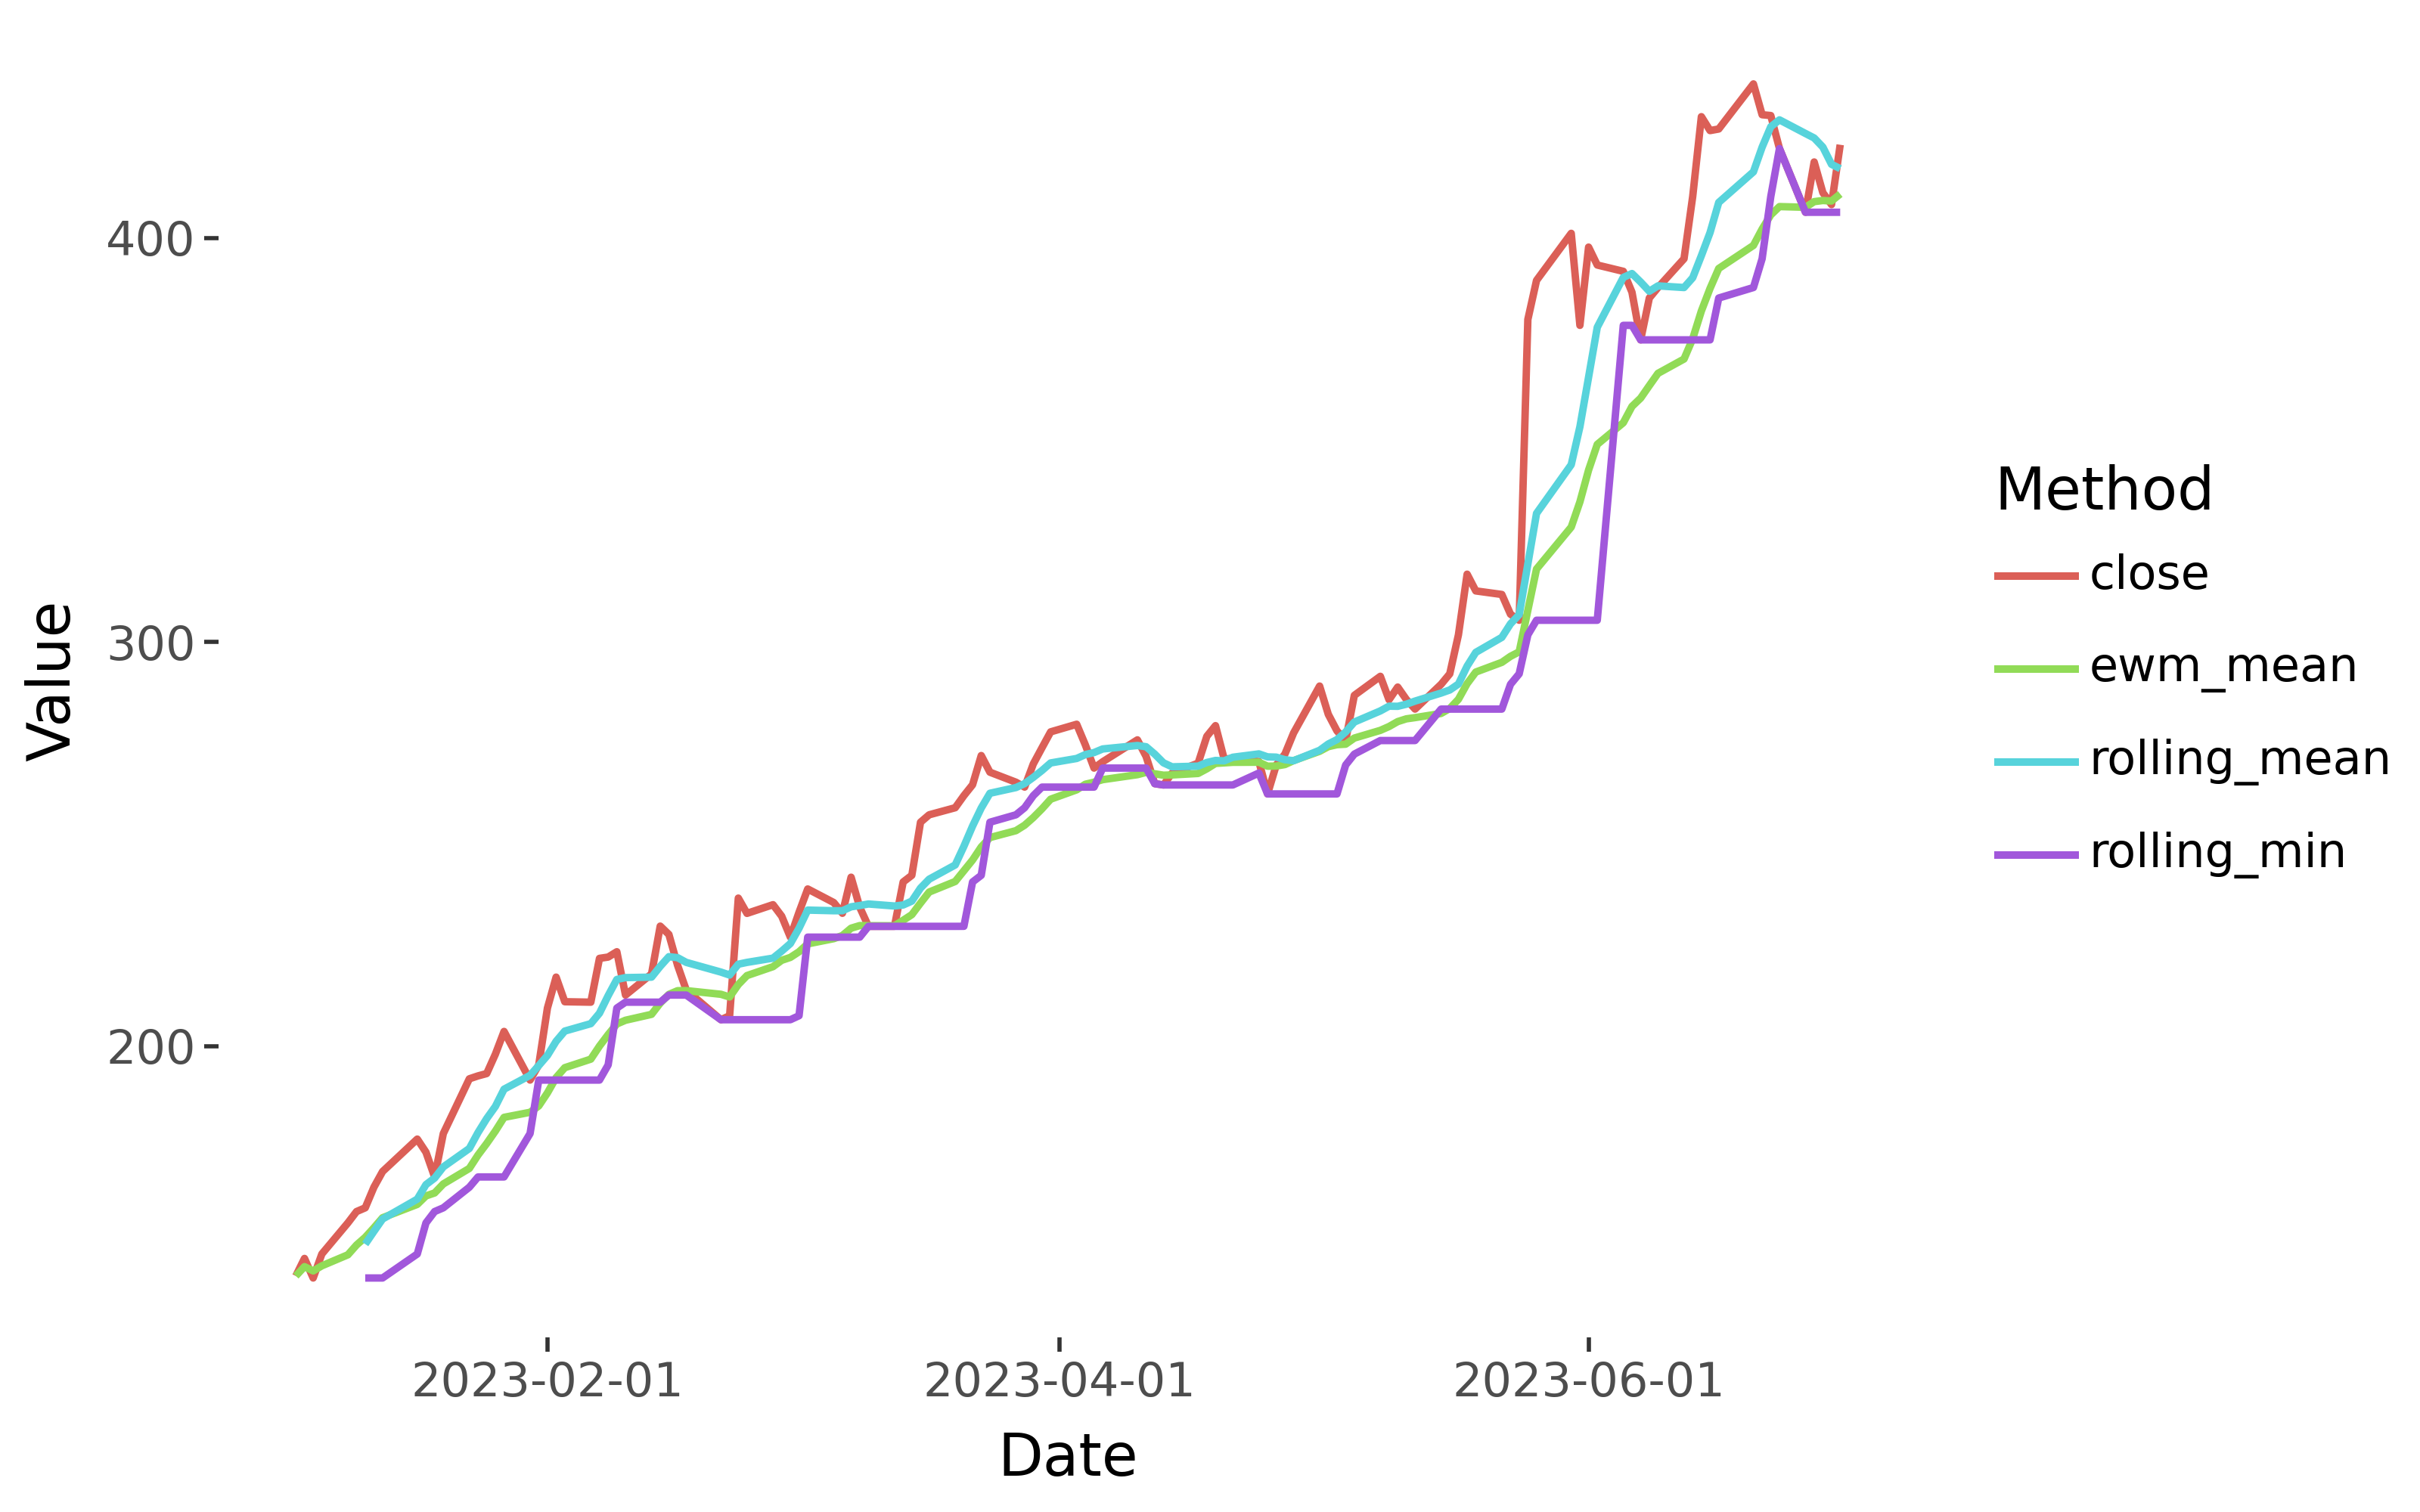

In [41]:
from plotnine import *

(
    ggplot(stock.unpivot(index="date"), aes("date", "value", color="variable"))
    + geom_line(size=1)
    + labs(x="Date", y="Value", color="Method")
    + theme_tufte(base_family="Guardian Sans", base_size=14)
    + theme(figure_size=(8, 5), dpi=200)
)

In [45]:
large_df_ints=pl.DataFrame(
    {"x":rng.integers(low=0,high=10_000,size=100_000_000)}
)

In [46]:
%%time
large_df_ints.select(pl.col("x").n_unique())

CPU times: user 3.04 s, sys: 381 ms, total: 3.42 s
Wall time: 1.64 s


x
u32
10000


In [47]:
%%time
large_df_ints.select(pl.col("x").approx_n_unique())

CPU times: user 464 ms, sys: 808 μs, total: 465 ms
Wall time: 466 ms


x
u32
10013
